In [222]:
## Assignment 2 
## Gargi Vaidya
## Part 6. 

Cumulative Reward Plot of Q Learning - 


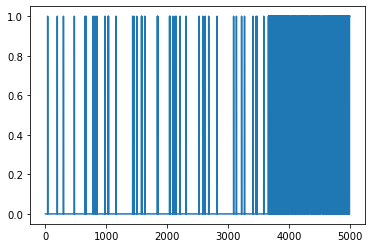

Convergence of Q-Learning - 


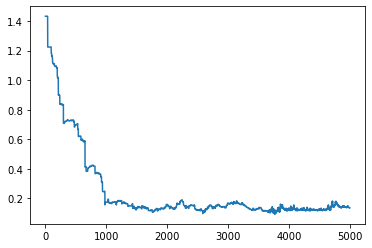

Training Reward Plot of Q Learning (Sliding Window Averaging)


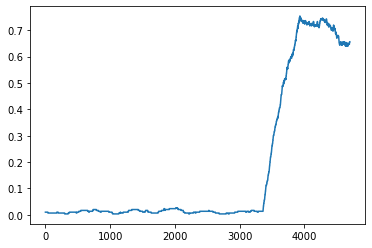

Convergence of Q-Learning (Sliding Window Averaging) 


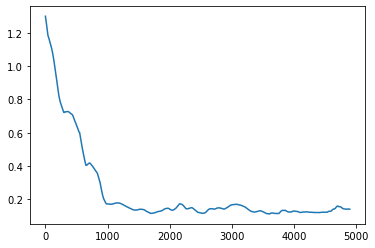

In [114]:
import gym
import numpy as np
import time
import itertools
from numpy import linalg
from matplotlib import pyplot as plt
import import_ipynb
from PI import Q_star

%matplotlib inline
import seaborn
from matplotlib.colors import LogNorm
env = gym.make('FrozenLake-v0')

# print('Number of Actions', env.nA) 
# print('Number of States ', env.nS)
# print('P[10,3]', env.P[10][3])

def fancy_visual(value_func,policy_int):    
    grid = 4    
    f, ax = plt.subplots(figsize=(11, 9))
    cmap = seaborn.diverging_palette(220, 10, as_cmap=True)
    reshaped = np.reshape(value_func,(grid,grid))
    seaborn.heatmap(reshaped, cmap="icefire",vmax=1.1, robust = True,
                square=True, xticklabels=grid+1, yticklabels=grid+1,
                linewidths=.5, cbar_kws={"shrink": .5}, ax=ax, annot=True, fmt="f")
    counter = 0
    for j in range(0, 4):
        for i in range(0, 4):
            if int(policy_int[counter]) == 1:
                plt.text(i+0.5, j+0.7, u'\u2193', fontsize=12)
            elif int(policy_int[counter]) == 3:
                plt.text(i+0.5, j+0.7, u'\u2191', fontsize=12)
            elif int(policy_int[counter]) == 0:
                plt.text(i+0.5, j+0.7, u'\u2190', fontsize=12)
            else:
                plt.text(i+0.5, j+0.7, u'\u2192', fontsize=12)
            counter=counter+1

    plt.title('Heatmap of policy iteration with value function values and directions')
    print('Value Function \n',value_func)
    print('Policy \n',policy_int)
    plt.show()
    
def swa(a, size):
    a_avg = []
    i = 0
    while i < (len(a) - size + 1):
        x = a[i : i + size]
        avg = sum(x) / size
        a_avg.append(avg)
        i += 1        
    return a_avg

def eps_greedy_action(Q, x, epsilon):
    np.random.seed(5000)
    if np.random.uniform(0, 1) < epsilon:
        a = env.action_space.sample()
    else:
        a = np.argmax(Q[x, :])
    return a 

def optimal_policy(Q):    
    pi = np.zeros(env.nS, dtype=int)
    for x in range(env.nS):
        pi[x] = np.argmax(Q[x, :])
    return pi

def q_learning():
    Q = np.zeros((env.nS, env.nA))
#     Q = np.random.rand(env.nS, env.nA)
    G = []
    diff = []
    steps = 0
    for i in range(max_episodes):
        ep_reward = 0
        x = env.reset()
        for j in itertools.count():
            
            if steps < decay_step:
                epsilon = max_epsilon - j * (max_epsilon - min_epsilon) / decay_step
            else:
                epsilon = min_epsilon
                
            alpha = 1500/(2000 + steps)
                
            a = eps_greedy_action(Q, x, epsilon)
            x_, r, done, info = env.step(a)
            ep_reward = r + gamma * ep_reward 
            
            steps += 1
            target = r + gamma* np.max(Q[x_, :])
            Q[x, a] += alpha * (target - Q[x, a])

            x = x_
            
            if done:
                break
        diff.append(linalg.norm(Q - Q_star, 2))
        G.append(ep_reward)                
    
    print("Cumulative Reward Plot of Q Learning - ")
    plt.plot(range(int(i+1)), G)
    plt.show()
    
    print("Convergence of Q-Learning - ")
    plt.plot(range(int(i+1)), diff)
    plt.show()
    
    G_av = swa(G, 300)
    diff_av = swa(diff, 100)
    
    print("Training Reward Plot of Q Learning (Sliding Window Averaging)")
    plt.plot(range(len(G_av)), G_av)
    plt.show()
    
    print("Convergence of Q-Learning (Sliding Window Averaging) ")
    plt.plot(range(len(diff_av)), diff_av)
    plt.show()
        
    return Q

max_epsilon = 1.0
min_epsilon = 0.1 # 0.01
# eps_decay = 0.9
decay_step = 28000 #60000 # 50000

# alpha_decay = 0.5
# alpha = 0.55

max_episodes = 5000 # 10000

gamma = 0.9

Qstar = q_learning()
# print("Time taken to converge : ", time.time() - start)
# print("Q Learning converged to : \n ", Qstar)
pi_star = optimal_policy(Qstar)
V_star = np.zeros(env.nS)
for x in range(env.nS):
    V_star[x] = np.max(Qstar[x])

Value Function 
 [0.06359276 0.05883156 0.06684801 0.0473761  0.08194652 0.
 0.11176342 0.         0.14845496 0.23725216 0.32040807 0.
 0.         0.3753909  0.67503835 0.        ]
Policy 
 [0 3 0 3 0 0 0 0 3 1 0 0 0 2 1 0]


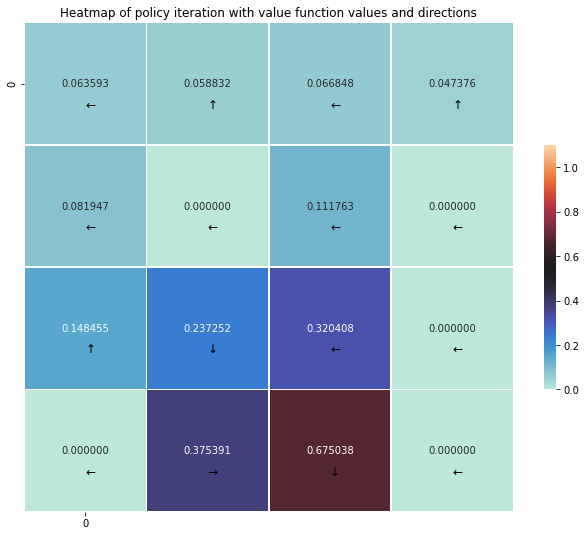

In [115]:
fancy_visual(V_star, pi_star)

In [116]:
print("Optimal Q-Value Function - \n", Q_star, "\n")
print("Optimal State Value Function - \n", V_star, "\n")
print("Optimal Policy - \n", pi_star, "\n")

Optimal Q-Value Function - 
 [[0.06876462 0.0665166  0.0665166  0.05962591]
 [0.03900127 0.0429049  0.04065688 0.06128152]
 [0.07429459 0.06868163 0.07258526 0.05732418]
 [0.03894755 0.03894755 0.0333346  0.05561485]
 [0.09173391 0.07110927 0.06421858 0.04813997]
 [0.         0.         0.         0.        ]
 [0.11214171 0.08986146 0.11214171 0.02228026]
 [0.         0.         0.         0.        ]
 [0.07110927 0.11781368 0.10173507 0.14532901]
 [0.15755228 0.24741373 0.2038198  0.13345539]
 [0.29955136 0.26591365 0.22533162 0.10785745]
 [0.         0.         0.         0.        ]
 [0.         0.         0.         0.        ]
 [0.18817808 0.30565225 0.379872   0.26591365]
 [0.39551371 0.63898559 0.6148887  0.53715313]
 [0.         0.         0.         0.        ]] 

Optimal State Value Function - 
 [0.06359276 0.05883156 0.06684801 0.0473761  0.08194652 0.
 0.11176342 0.         0.14845496 0.23725216 0.32040807 0.
 0.         0.3753909  0.67503835 0.        ] 

Optimal Policy - 

In [ ]:
## Implemented different functions to decay the epsilon-exploration and learning rate and converge within 5000 episodes

In [ ]:
## End of Part 6.